# EJERCICIOS

In [1]:
import numpy as np
import joblib
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt
import warnings
from sklearn.datasets import load_diabetes, load_iris
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV, cross_val_predict
from sklearn.linear_model import LinearRegression, Ridge, Lasso, LogisticRegression
from sklearn.svm import SVR
from sklearn.metrics import confusion_matrix, precision_score, recall_score, f1_score, accuracy_score, root_mean_squared_error
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline
from sklearn.exceptions import ConvergenceWarning

In [2]:
warnings.filterwarnings("ignore", category=FutureWarning)

## EJERCICIO 1

Imagina que estás usando regresión polinomial. Trazas las curvas de aprendizaje y te das cuenta de que hay un espacio grande entre el error de entrenamiento y el error de validación. ¿Qué está pasando? Piensa en tres formas de poder arreglarlo

In [ ]:
# Seguramente el modelo haya cogido un polinomio de grado demasiado alto para ajustar la curva lo mejor posible a los datos
# de entrenamiento, es decir está sobreajustado a los datos de entrenamiento y no generaliza bien, tambien puede deberse a 
# un volumen de datos más pequeño del necesario o que los datos tengan demasiado ruido y que el modelo no sea capaz de ignorar esos puntos
# # erraticos. 

# 1º: Disminuir el grado del polinomio: para que sea menos flexible y generalice mejor.
# 2º: Conseguir más datos, en caso de que no fuera factible tratar de sintetizar más datos.
# 3: Introducir términos de penalización como Ridge Regression o Lasso Regression



## EJERCICIO 2

Imagina que estás utilizando regresión de Ridge y observas que el error de entrenamiento y el error de validación son casi iguales y bastante altos. ¿Deberías incrementar el hiperparámetro de regularización o reducirlo (α)?

In [ ]:
# Si sus resultados son malos tanto con el conjunto de validación como en el de entrenamiento quiere decir que el modelo está subajustado,
# es demasiado simple y no puede capturar bien la relación entre los datos. Habria que reducir α para que no penalice tanto al modelo 
# y este pueda generalizar mejor.

## EJERCICIO 3

Ejercicio de Regresión con el Conjunto de Datos de Diabetes

* Objetivo: El objetivo de este ejercicio es desarrollar un modelo de regresión que pueda predecir la progresión de la diabetes un año después del inicio basándose en diversas mediciones clínicas.

* Datos: Utilizarás el conjunto de datos de diabetes proporcionado por Scikit-Learn, que contiene diez variables base (edad, sexo, índice de masa corporal, presión arterial y seis mediciones de suero sanguíneo) para 442 pacientes.

### RECOPILACIÓN Y PREPARACIÓN DE LOS DATOS

#### OBTENER LOS DATOS

In [4]:
dataset = load_diabetes(as_frame=True)
X, y = dataset.data, dataset.target

#### EXPLORAR LOS DATOS

In [8]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 442 entries, 0 to 441
Data columns (total 10 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   age     442 non-null    float64
 1   sex     442 non-null    float64
 2   bmi     442 non-null    float64
 3   bp      442 non-null    float64
 4   s1      442 non-null    float64
 5   s2      442 non-null    float64
 6   s3      442 non-null    float64
 7   s4      442 non-null    float64
 8   s5      442 non-null    float64
 9   s6      442 non-null    float64
dtypes: float64(10)
memory usage: 34.7 KB


In [9]:
y.info()

<class 'pandas.core.series.Series'>
RangeIndex: 442 entries, 0 to 441
Series name: target
Non-Null Count  Dtype  
--------------  -----  
442 non-null    float64
dtypes: float64(1)
memory usage: 3.6 KB


Muestra los primero datos de X e y

In [5]:
X.head()

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6
0,0.038076,0.050680,0.061696,0.021872,-0.044223,-0.034821,-0.043401,-0.002592,0.019907,-0.017646
1,-0.001882,-0.044642,-0.051474,-0.026328,-0.008449,-0.019163,0.074412,-0.039493,-0.068332,-0.092204
2,0.085299,0.050680,0.044451,-0.005670,-0.045599,-0.034194,-0.032356,-0.002592,0.002861,-0.025930
3,-0.089063,-0.044642,-0.011595,-0.036656,0.012191,0.024991,-0.036038,0.034309,0.022688,-0.009362
4,0.005383,-0.044642,-0.036385,0.021872,0.003935,0.015596,0.008142,-0.002592,-0.031988,-0.046641


In [ ]:
#X['sex']=X['sex']+0.044642
#X['sex'] = X['sex'].apply(lambda x: x + 0.044642)
#X.head()
type(X)

C:\Users\zapat\AppData\Local\Temp\ipykernel_19696\3798997849.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X['sex'] = X['sex'].apply(lambda x: x + 0.044642)


,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6
0,0.038076,0.139964,0.061696,0.021872,-0.044223,-0.034821,-0.043401,-0.002592,0.019907,-0.017646
1,-0.001882,0.044642,-0.051474,-0.026328,-0.008449,-0.019163,0.074412,-0.039493,-0.068332,-0.092204
2,0.085299,0.139964,0.044451,-0.005670,-0.045599,-0.034194,-0.032356,-0.002592,0.002861,-0.025930
3,-0.089063,0.044642,-0.011595,-0.036656,0.012191,0.024991,-0.036038,0.034309,0.022688,-0.009362
4,0.005383,0.044642,-0.036385,0.021872,0.003935,0.015596,0.008142,-0.002592,-0.031988,-0.046641


In [6]:
y.head()

0    151.0
1     75.0
2    141.0
3    206.0
4    135.0
Name: target, dtype: float64

Usa .describe y .info para ver un poco de información

In [7]:
X.describe()

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6
count,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02
mean,-2.511817e-19,1.230790e-17,-2.245564e-16,-4.797570e-17,-1.381499e-17,3.918434e-17,-5.777179e-18,-9.042540e-18,9.293722e-17,1.130318e-17
std,4.761905e-02,4.761905e-02,4.761905e-02,4.761905e-02,4.761905e-02,4.761905e-02,4.761905e-02,4.761905e-02,4.761905e-02,4.761905e-02
min,-1.072256e-01,-4.464164e-02,-9.027530e-02,-1.123988e-01,-1.267807e-01,-1.156131e-01,-1.023071e-01,-7.639450e-02,-1.260971e-01,-1.377672e-01
25%,-3.729927e-02,-4.464164e-02,-3.422907e-02,-3.665608e-02,-3.424784e-02,-3.035840e-02,-3.511716e-02,-3.949338e-02,-3.324559e-02,-3.317903e-02
50%,5.383060e-03,-4.464164e-02,-7.283766e-03,-5.670422e-03,-4.320866e-03,-3.819065e-03,-6.584468e-03,-2.592262e-03,-1.947171e-03,-1.077698e-03
75%,3.807591e-02,5.068012e-02,3.124802e-02,3.564379e-02,2.835801e-02,2.984439e-02,2.931150e-02,3.430886e-02,3.243232e-02,2.791705e-02
max,1.107267e-01,5.068012e-02,1.705552e-01,1.320436e-01,1.539137e-01,1.987880e-01,1.811791e-01,1.852344e-01,1.335973e-01,1.356118e-01


Representa cada una de la características

<Figure size 640x480 with 0 Axes>

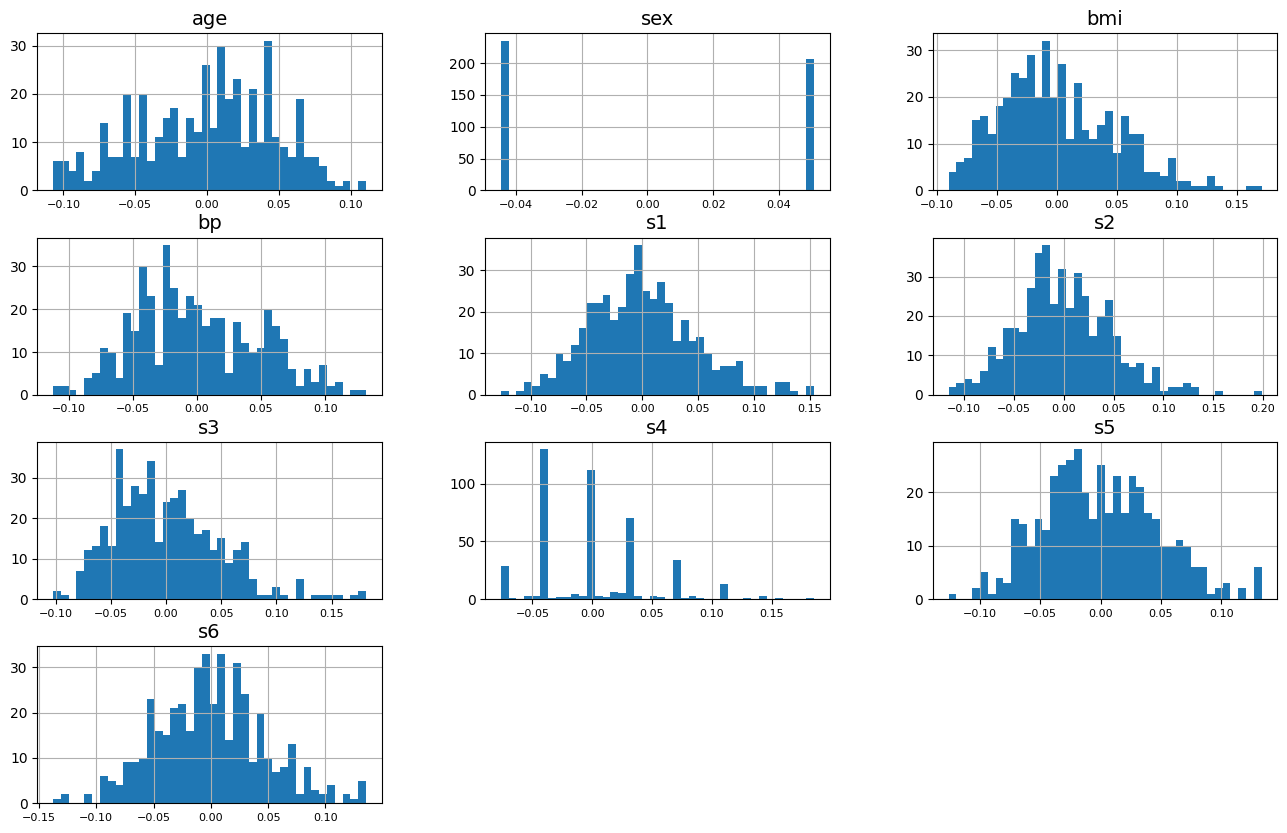

In [10]:
plt.tight_layout()
plt.rc('font', size=14)
plt.rc('axes', labelsize=14, titlesize=14)
plt.rc('legend', fontsize=14)
plt.rc('xtick', labelsize=8)
plt.rc('ytick', labelsize=10)
X.hist(bins=40, figsize=(16, 10))
plt.show()

Muestra la matriz de correlaciones

#### DIVIDIR LOS DATOS

#### PREPARAR LOS DATOS

### ENTRENAMIENTO Y EVALUACIÓN DEL MODELO

Crea y entrena el modelo con diferentes algoritmos y muestra los resultados obtenidos con validación cruzada y utilizando la métrica RMSE para medir el error

Calcula el máximo de y (del dataset original) y el mínimo de y (del dataset original) para ver con prespectiva si RMSE es aceptable o no.

### OPTIMIZACIÓN DEL MODELO

Vamos a suponer que el mejor modelo que has obtenido es con Ridge y vamoas a aplicar búsqueda exhaustiva para el parámetro alpha.

Evalúa este mejor modelo en el conjunto de pruebas

### PRESENTACIÓN DEL MODELO

Guarda el modelo en un archivo

Opcional: hacer un script de Python que pida los datos y te prediga el resultado

## EJERCICIO 4

Usa regresión logística para crear un modelo que deduzca el tipo de flor iris

### RECOPILACIÓN Y PREPARACIÓN DE LOS DATOS

#### OBTENER LOS DATOS

In [ ]:
iris = load_iris(as_frame=True)
X = iris.data
y = iris.target

#### EXPLORAR LOS DATOS

Visualiza los datos

Representa la matriz de correlaciones

#### DIVIDIR LOS DATOS

#### PREPARAR LOS DATOS

Solo hay que estandarizar las columnas y por lo tanto se puede hacer directamente en la pipeline que define el modelo en el siguiente punto

### SELECCIÓN Y ENTRENAMIENTO DEL MODELO

Crear y entrenar el modelo con regresión logística y validacion cruzada ¿cuál es la exactitud en el conjunto de entrenamiento?

Calcula matriz de confusion, precision, recall y f1 en el conjunto de entrenamiento

¿Qué podemos deducir?

### OPTIMIZACIÓN DEL MODELO

Aplica búsqueda exhaustiva con los hiperparámetros de LogisticRegression (C y solver) y guarda el mejor modelo en una variable.

### EVALUACIÓN DEL MODELO

Evalua este mejor modelo en el conjunto de pruebas (exactitud, matriz de confusión, precision, recall y f1)

### PRESENTACIÓN DEL MODELO

Guarda el modelo en un archivo

## EJERCICIO 5

Intenta predecir las emisiones de CO2 con el menor error posible (sigue todos los pasos incluido crear un script para que haga predicciones).

Prueba diferentes modelos para intentar construir el mejor modelo posible (explica todos los pasos que das hasta llegar a la solución, quiero ver también los modelos que pruebas y luego los rechazas)

Dataset: https://www.kaggle.com/datasets/midhundasl/co2-emission-of-cars-dataset